In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('cardataset.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(),engine (CC),max_power (bhp),torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,"11.5@ 4,500(kgm@ rpm)",5.0


In [3]:
df.shape

(8128, 13)

In [4]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage()', 'engine (CC)', 'max_power (bhp)',
       'torque', 'seats'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             8128 non-null   object 
 1   year             8128 non-null   int64  
 2   selling_price    8128 non-null   int64  
 3   km_driven        8128 non-null   int64  
 4   fuel             8128 non-null   object 
 5   seller_type      8128 non-null   object 
 6   transmission     8128 non-null   object 
 7   owner            8128 non-null   object 
 8   mileage()        7907 non-null   float64
 9   engine (CC)      7907 non-null   float64
 10  max_power (bhp)  7913 non-null   object 
 11  torque           7906 non-null   object 
 12  seats            7907 non-null   float64
dtypes: float64(3), int64(3), object(7)
memory usage: 825.6+ KB


In [6]:
df["name"] = df["name"].str.split(" ").str.get(0)


In [7]:
df["name"].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Fiat', 'Datsun', 'Jeep',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
       'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
       'Kia', 'Force', 'Ambassador', 'Ashok', 'Isuzu', 'Opel', 'Peugeot'],
      dtype=object)

In [8]:
df["fuel"].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [9]:
df["seller_type"].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [10]:
df["transmission"].unique()

array(['Manual', 'Automatic'], dtype=object)

In [11]:


df.isnull().sum()

name                 0
year                 0
selling_price        0
km_driven            0
fuel                 0
seller_type          0
transmission         0
owner                0
mileage()          221
engine (CC)        221
max_power (bhp)    215
torque             222
seats              221
dtype: int64

In [12]:
df.describe()

,year,selling_price,km_driven,mileage(),engine (CC),seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000,7907.000000,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,19.418783,1458.625016,5.416719
std,4.044249,8.062534e+05,5.655055e+04,4.037145,503.916303,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,16.780000,1197.000000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,22.320000,1582.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,14.000000


### Imputation

In [13]:
df["mileage()"].fillna(df["mileage()"].mean(),inplace=True)
df["engine (CC)"].fillna(df["engine (CC)"].median(),inplace=True)
df["seats"].fillna(df["seats"].median(),inplace=True)


In [14]:
df.isnull().sum()

name                 0
year                 0
selling_price        0
km_driven            0
fuel                 0
seller_type          0
transmission         0
owner                0
mileage()            0
engine (CC)          0
max_power (bhp)    215
torque             222
seats                0
dtype: int64

Drop Columns:

Now if we observe the above dataset, the toruq and max power
column has of no importance to our analysis.


In [15]:

df.drop(["torque"],axis=1,inplace=True)
df.drop(["max_power (bhp)"],axis=1,inplace=True)

In [16]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage()        0
engine (CC)      0
seats            0
dtype: int64

In [17]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(),engine (CC),seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,5.0


In [18]:
df["Current_year"]=2022
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(),engine (CC),seats,Current_year
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,5.0,2022
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,5.0,2022
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,5.0,2022
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,5.0,2022
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,5.0,2022


In [19]:
df["no_year"]=df["Current_year"]-df["year"]
df.drop(["Current_year"],axis=1,inplace=True)
df.drop(["year"],axis=1,inplace=True)
df.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(),engine (CC),seats,no_year
0,Maruti,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,5.0,8
1,Skoda,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,5.0,8
2,Honda,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,5.0,16
3,Hyundai,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,5.0,12
4,Maruti,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,5.0,15


In [20]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

selling_price    420001.0000
km_driven         63000.0000
mileage()             5.4775
engine (CC)         385.0000
seats                 0.0000
no_year               6.0000
dtype: float64


In [21]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(5870, 11)


C:\Users\Ela Shresth\AppData\Local\Temp\ipykernel_1876\2085897488.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [22]:
print(df['selling_price'].skew())
df['selling_price'].describe()



4.193533440675855


count    8.128000e+03
mean     6.382718e+05
std      8.062534e+05
min      2.999900e+04
25%      2.549990e+05
50%      4.500000e+05
75%      6.750000e+05
max      1.000000e+07
Name: selling_price, dtype: float64

In [23]:
##skewness of 4.19 shows the variable selling price has right skewed distribution

<AxesSubplot:>

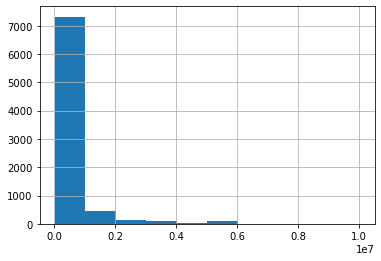

In [24]:
df.selling_price.hist()

### Handling Outliers Selling Price


In [25]:
# Computing 10th, 90th percentiles and replacing the outliers
print(df['selling_price'].quantile(0.10))
print(df['selling_price'].quantile(0.90))

150000.0
1025000.0


In [26]:
df["selling_price"] = np.where(df["selling_price"] <df['selling_price'].quantile(0.10), df['selling_price'].quantile(0.10),df['selling_price'])
df["selling_price"] = np.where(df["selling_price"] >df['selling_price'].quantile(0.90), df['selling_price'].quantile(0.90),df['selling_price'])
print(df['selling_price'].skew())

0.5571499026670337


<AxesSubplot:xlabel='selling_price'>

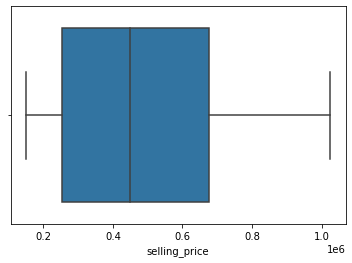

In [27]:
sns.boxplot(x=df["selling_price"])

Handling Outliers mileage 

In [28]:
print(df['mileage()'].quantile(0.10))
print(df['mileage()'].quantile(0.90))

13.988000000000001
24.7


<AxesSubplot:xlabel='mileage()'>

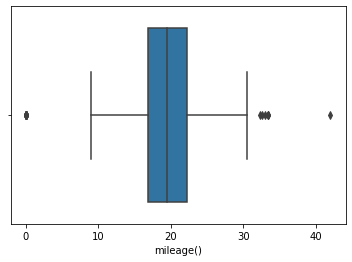

In [29]:
sns.boxplot(x=df["mileage()"])

In [30]:
df["mileage()"] = np.where(df["mileage()"] <df['mileage()'].quantile(0.10), df['mileage()'].quantile(0.10),df['mileage()'])
df["mileage()"] = np.where(df["mileage()"] >df['mileage()'].quantile(0.90), df['mileage()'].quantile(0.90),df['mileage()'])
print(df['mileage()'].skew())

-0.03038353380405013


<AxesSubplot:xlabel='mileage()'>

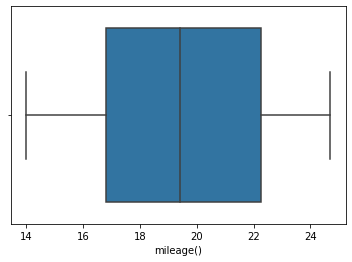

In [31]:
sns.boxplot(x=df["mileage()"])

### Handling Outliers Km_driven

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='km_driven'>

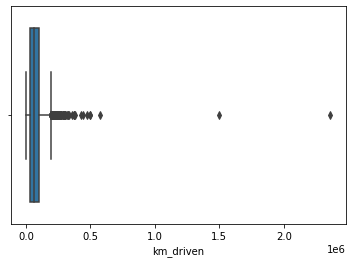

In [32]:
sns.boxplot(df["km_driven"])

In [33]:
df["km_driven"] = np.where(df["km_driven"] <df['km_driven'].quantile(0.10), df['km_driven'].quantile(0.10),df['km_driven'])
df["km_driven"] = np.where(df["km_driven"] >df['km_driven'].quantile(0.90), df['km_driven'].quantile(0.90),df['km_driven'])
print(df['km_driven'].skew())

0.169352986582077


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='km_driven'>

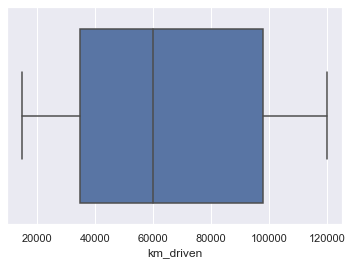

In [34]:
sns.set(style="darkgrid")
sns.boxplot(df["km_driven"])


### Handling Outliers engine (CC)

<AxesSubplot:xlabel='engine (CC)'>

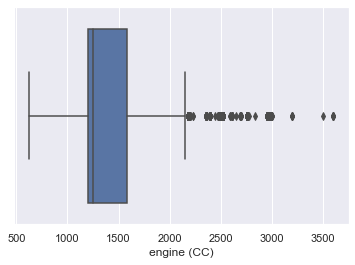

In [35]:
sns.set(style="darkgrid")
sns.boxplot(x=df["engine (CC)"])


In [36]:
df["engine (CC)"] = np.where(df["engine (CC)"] <df['engine (CC)'].quantile(0.10), df['engine (CC)'].quantile(0.10),df['engine (CC)'])
df["engine (CC)"] = np.where(df["engine (CC)"] >df['engine (CC)'].quantile(0.90), df['engine (CC)'].quantile(0.90),df['engine (CC)'])
print(df['engine (CC)'].skew())

0.9097318870750064


<AxesSubplot:xlabel='engine (CC)'>

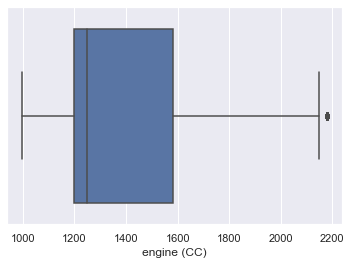

In [37]:
sns.set(style="darkgrid")
sns.boxplot(x=df["engine (CC)"])

# EDA

### Univariate Graphical EDA

### Quantitavie Variable

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='selling_price', ylabel='Density'>

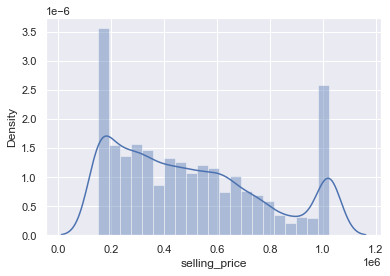

In [38]:
sns.distplot(df["selling_price"])

<AxesSubplot:xlabel='selling_price', ylabel='Count'>

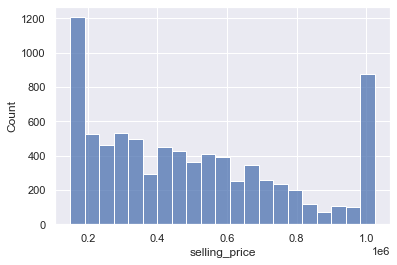

In [39]:
sns.histplot(df["selling_price"])

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mileage()', ylabel='Density'>

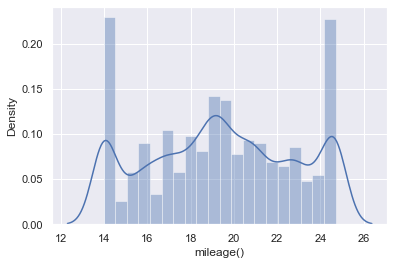

In [40]:
sns.distplot(df["mileage()"])

<AxesSubplot:xlabel='mileage()', ylabel='Count'>

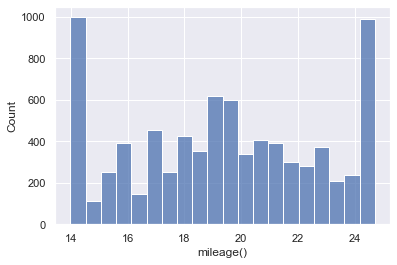

In [41]:
sns.histplot(df["mileage()"])

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='km_driven', ylabel='Density'>

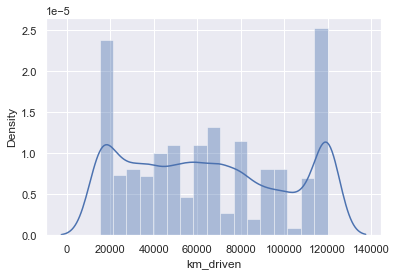

In [42]:
sns.distplot(df["km_driven"])

<AxesSubplot:xlabel='km_driven', ylabel='Count'>

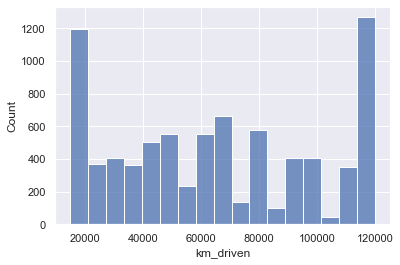

In [43]:
sns.histplot(df["km_driven"])

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='engine (CC)', ylabel='Density'>

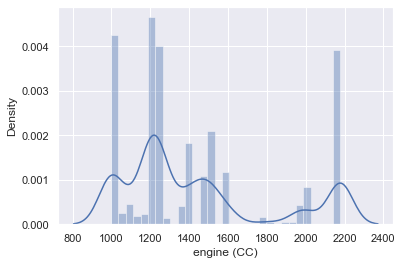

In [44]:
sns.distplot(df["engine (CC)"])

<AxesSubplot:xlabel='engine (CC)', ylabel='Count'>

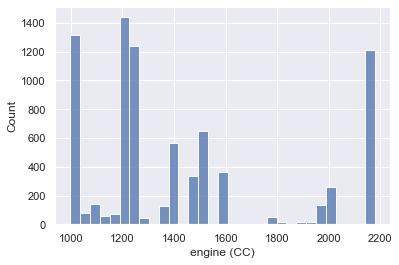

In [45]:
sns.histplot(df["engine (CC)"])

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='seats', ylabel='Density'>

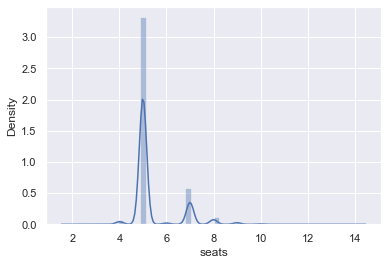

In [46]:
sns.distplot(df["seats"])

<AxesSubplot:xlabel='seats', ylabel='Count'>

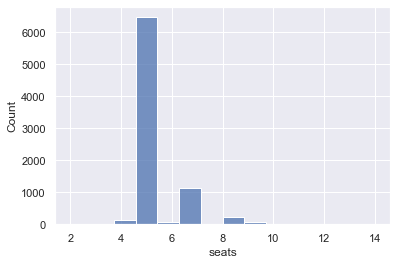

In [47]:
sns.histplot(df["seats"])

In [48]:
df['seats'].unique()

array([ 5.,  4.,  7.,  8.,  6.,  9., 10., 14.,  2.])

In [49]:
print(df['seats'].skew())

2.015507247545297


In [50]:
df.seats.value_counts()

5.0     6475
7.0     1120
8.0      236
4.0      133
9.0       80
6.0       62
10.0      19
2.0        2
14.0       1
Name: seats, dtype: int64

### Categorical Variable

In [51]:
pd.crosstab(index=df["fuel"],columns="Count")

col_0,Count
fuel,
CNG,57
Diesel,4402
LPG,38
Petrol,3631


<AxesSubplot:xlabel='fuel', ylabel='count'>

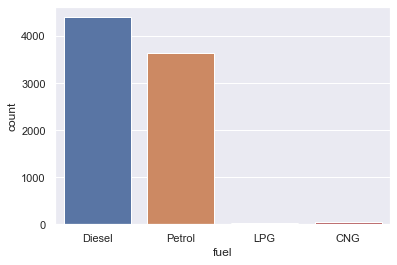

In [52]:
sns.countplot(x="fuel",data=df)

<AxesSubplot:xlabel='transmission', ylabel='count'>

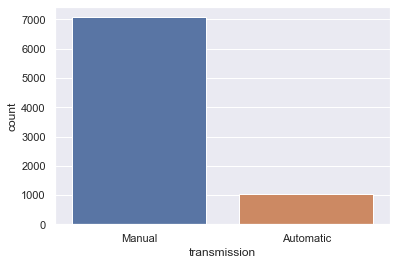

In [53]:
sns.countplot(x="transmission",data=df)

<AxesSubplot:xlabel='owner', ylabel='count'>

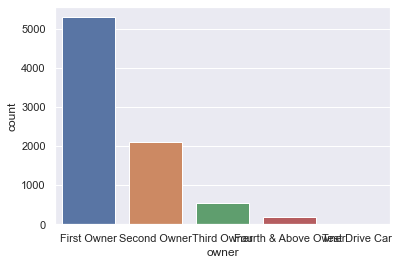

In [54]:
sns.countplot(x="owner",data=df)

<AxesSubplot:xlabel='seller_type', ylabel='count'>

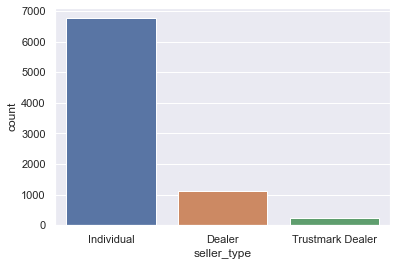

In [55]:
sns.countplot(x="seller_type",data=df)

### Bi-variate Graphical EDA

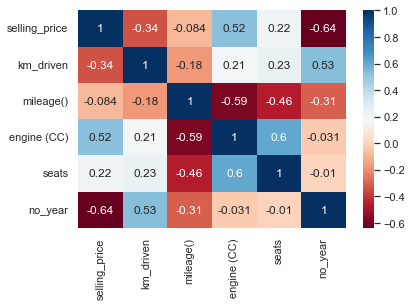

In [56]:
sns.heatmap(df.corr(), annot=True, cmap="RdBu")
plt.show()

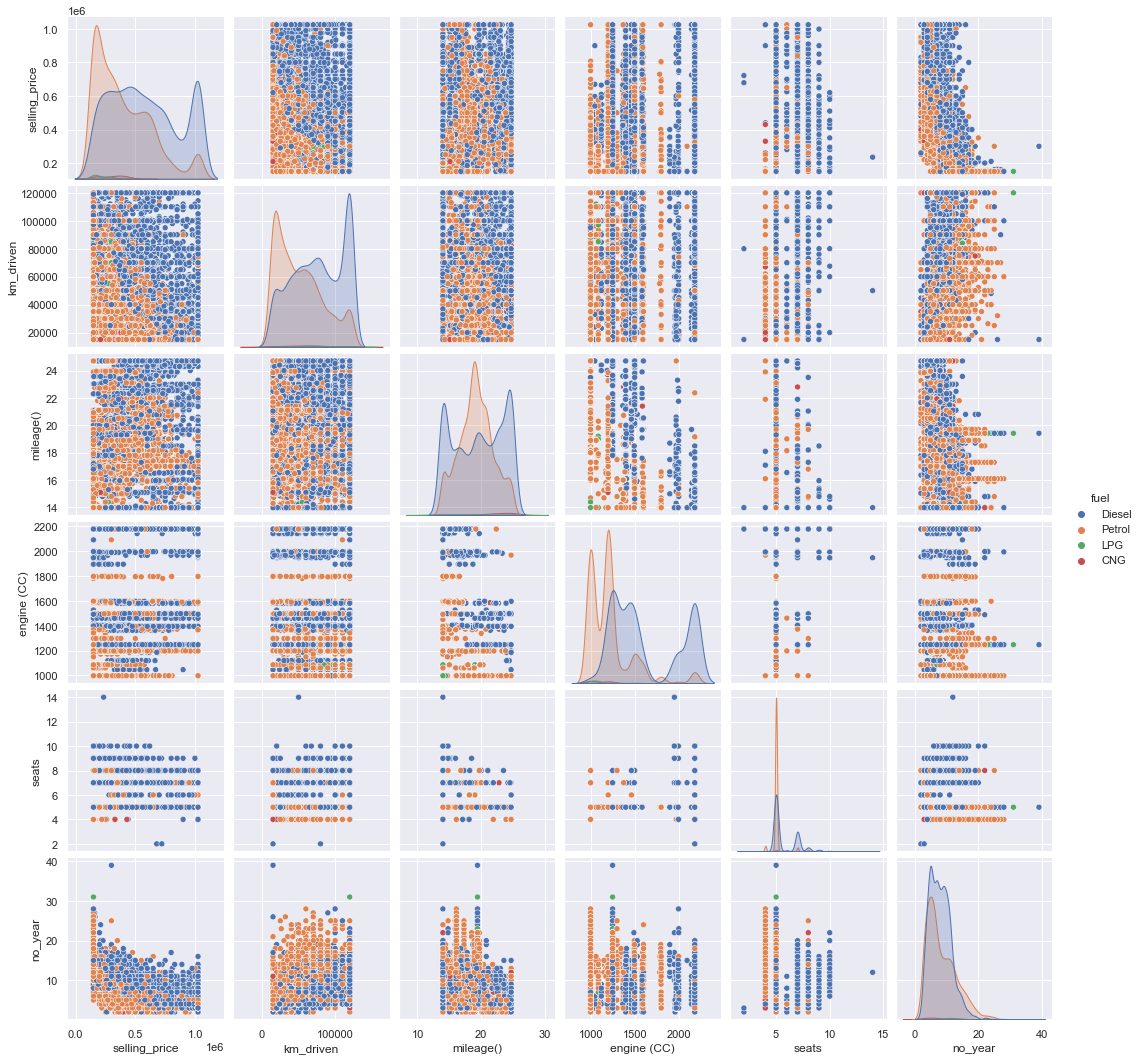

In [57]:
sns.pairplot(df,kind="scatter",hue="fuel")
plt.show()

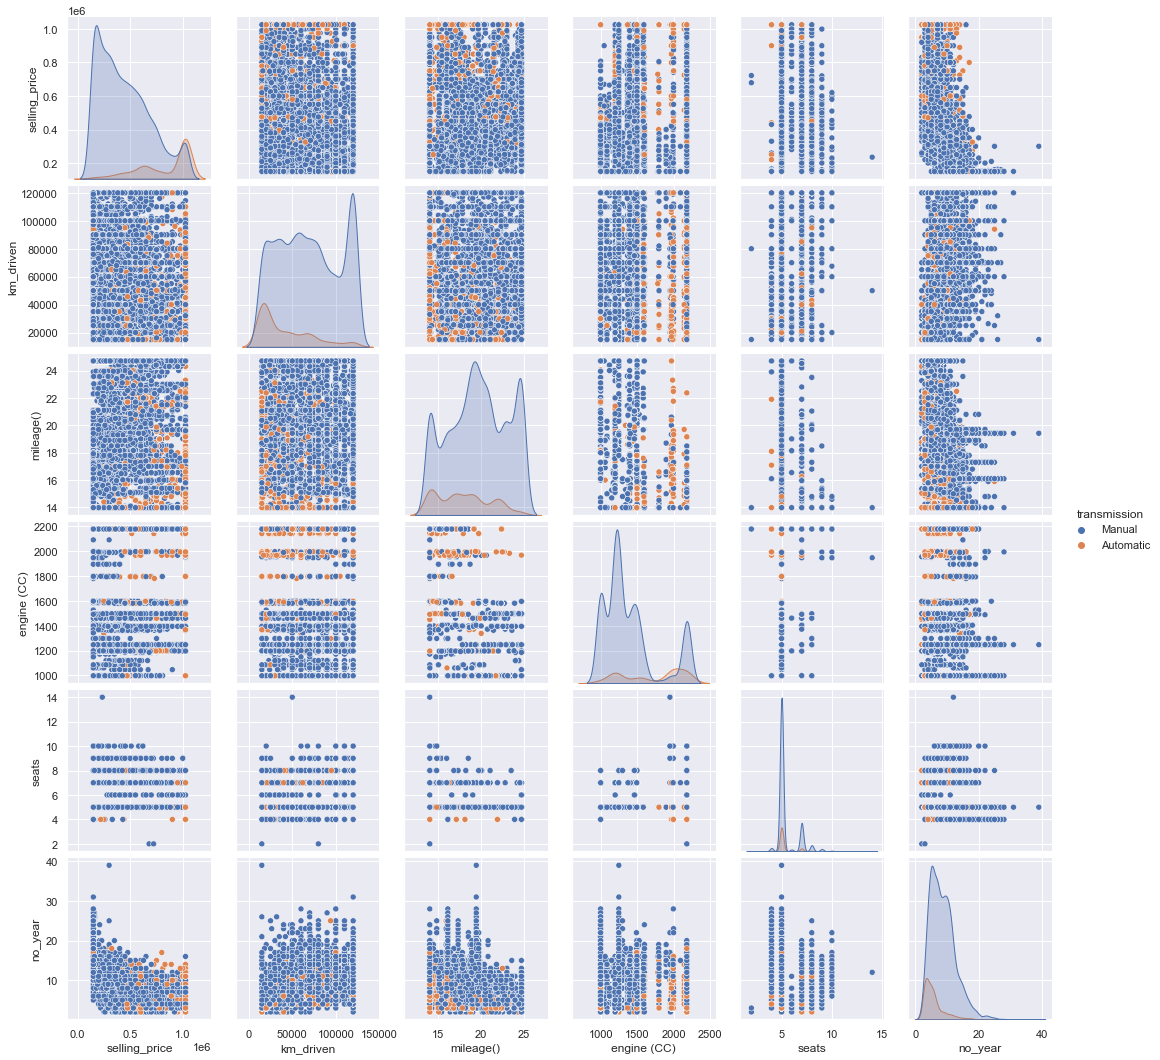

In [58]:
sns.pairplot(df,kind="scatter",hue="transmission")
plt.show()

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [60]:
df = pd.get_dummies(df,drop_first = True)
df.head()


,selling_price,km_driven,mileage(),engine (CC),seats,no_year,name_Ashok,name_Audi,name_BMW,name_Chevrolet,...,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,450000.0,120000.0,23.40,1248.0,5.0,8,0,0,0,0,...,1,0,0,1,0,1,0,0,0,0
1,370000.0,120000.0,21.14,1498.0,5.0,8,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0
2,158000.0,120000.0,17.70,1497.0,5.0,16,0,0,0,0,...,0,0,1,1,0,1,0,0,0,1
3,225000.0,120000.0,23.00,1396.0,5.0,12,0,0,0,0,...,1,0,0,1,0,1,0,0,0,0
4,150000.0,120000.0,16.10,1298.0,5.0,15,0,0,0,0,...,0,0,1,1,0,1,0,0,0,0


In [61]:
y=df["selling_price"]
X=df.drop(["selling_price"],axis=1)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (6502, 46)
x test:  (1626, 46)
y train:  (6502,)
y test:  (1626,)


In [63]:
# now let's see the shape of train and test dataset
print(X.shape,X_train.shape,X_test.shape)


(8128, 46) (6502, 46) (1626, 46)


In [64]:
CV = []
R2_train = []
R2_test = []

def car_pred_model(model,model_name):
    # Training model
    model.fit(X_train,y_train)
            
    # R2 score of train set
    y_pred_train = model.predict(X_train)
    R2_train_model = r2_score(y_train,y_pred_train)
    R2_train.append(round(R2_train_model,2))
    
    # R2 score of test set
    y_pred_test = model.predict(X_test)
    R2_test_model = r2_score(y_test,y_pred_test)
    R2_test.append(round(R2_test_model,2))
    
    # R2 mean of train set using Cross validation
    cross_val = cross_val_score(model ,X_train ,y_train ,cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean,2))
    
    # Printing results
    print("Train R2-score :",round(R2_train_model,2))
    print("Test R2-score :",round(R2_test_model,2))
    print("Train CV scores :",cross_val)
    print("Train CV mean :",round(cv_mean,2))
    
    # Plotting Graphs 
    # Residual Plot of train data
    fig, ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Residual Plot of Train samples')
    sns.distplot((y_train-y_pred_train),hist = False,ax = ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')
    
    # Y_test vs Y_train scatter plot
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(x = y_test, y = y_pred_test)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')
    
    plt.show()

### Linear Regression

Train R2-score : 0.78
Test R2-score : 0.78
Train CV scores : [0.77577689 0.7728046  0.78091591 0.77555482 0.76732155]
Train CV mean : 0.77


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


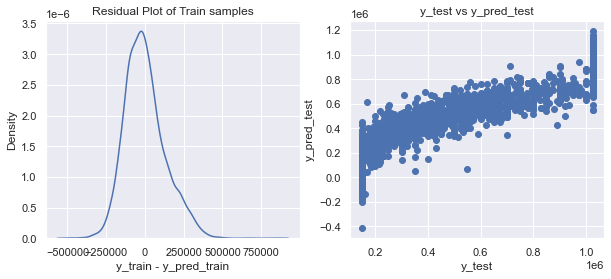

In [65]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
car_pred_model(lr,"Linear_regressor.pkl")

### Ridge Regression

Train R2-score : 0.78
Test R2-score : 0.78
Train CV scores : [0.77580432 0.77325806 0.78262783 0.77403681 0.76782583]
Train CV mean : 0.77


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


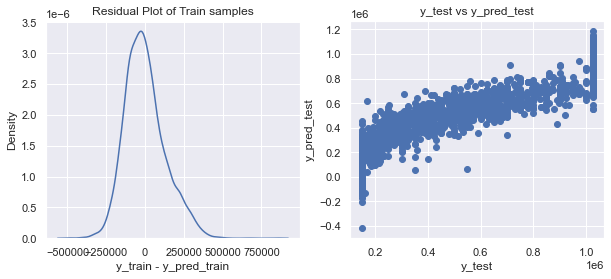

In [66]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

# Creating Ridge model object
rg = Ridge()
# range of alpha 
alpha = np.logspace(-3,3,num=14)

# Creating RandomizedSearchCV to find the best estimator of hyperparameter
rg_rs = RandomizedSearchCV(estimator = rg, param_distributions = dict(alpha=alpha))

car_pred_model(rg_rs,"ridge.pkl")

### Lasso Regression

D:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.411e+13, tolerance: 4.011e+10
  model = cd_fast.enet_coordinate_descent(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.426e+13, tolerance: 4.030e+10
  model = cd_fast.enet_coordinate_descent(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.384e+13, tolerance: 3.952e+10
  model = cd_fast.enet_coo

D:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.426e+13, tolerance: 4.030e+10
  model = cd_fast.enet_coordinate_descent(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.384e+13, tolerance: 3.952e+10
  model = cd_fast.enet_coordinate_descent(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.416e+13, tolerance: 4.011e+10
  model = cd_fast.enet_coo

D:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.483e+13, tolerance: 3.177e+10
  model = cd_fast.enet_coordinate_descent(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.488e+13, tolerance: 3.171e+10
  model = cd_fast.enet_coordinate_descent(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.502e+13, tolerance: 3.222e+10
  model = cd_fast.enet_coo

D:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.947e+13, tolerance: 3.225e+10
  model = cd_fast.enet_coordinate_descent(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.344e+13, tolerance: 3.189e+10
  model = cd_fast.enet_coordinate_descent(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.461e+13, tolerance: 3.245e+10
  model = cd_fast.enet_coo

D:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.504e+13, tolerance: 3.147e+10
  model = cd_fast.enet_coordinate_descent(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.526e+13, tolerance: 3.197e+10
  model = cd_fast.enet_coordinate_descent(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.466e+13, tolerance: 3.134e+10
  model = cd_fast.enet_coo

D:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.533e+13, tolerance: 3.205e+10
  model = cd_fast.enet_coordinate_descent(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.568e+13, tolerance: 3.255e+10
  model = cd_fast.enet_coordinate_descent(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.497e+13, tolerance: 3.195e+10
  model = cd_fast.enet_coo

D:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.568e+13, tolerance: 3.255e+10
  model = cd_fast.enet_coordinate_descent(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.497e+13, tolerance: 3.195e+10
  model = cd_fast.enet_coordinate_descent(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.498e+13, tolerance: 3.160e+10
  model = cd_fast.enet_coo

D:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.514e+13, tolerance: 3.218e+10
  model = cd_fast.enet_coordinate_descent(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.542e+13, tolerance: 3.268e+10
  model = cd_fast.enet_coordinate_descent(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.783e+12, tolerance: 3.207e+10
  model = cd_fast.enet_coo

Train R2-score : 0.78
Test R2-score : 0.78
Train CV scores : [0.7756397  0.77333678 0.78265122 0.77486059 0.76797592]
Train CV mean : 0.77


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


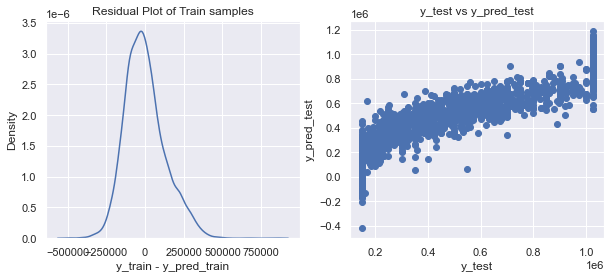

In [67]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV

ls = Lasso()
alpha = np.logspace(-3,3,num=14) # range for alpha

ls_rs = RandomizedSearchCV(estimator = ls, param_distributions = dict(alpha=alpha))
car_pred_model(ls_rs,"lasso.pkl")

### Random Forest 

In [68]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()

# Number of trees in Random forest
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

rf_rs = RandomizedSearchCV(estimator = rf, param_distributions = param_grid)

In [ ]:
car_pred_model(rf_rs,'random_forest.pkl')
print(rf_rs.best_estimator_)

### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

gb = GradientBoostingRegressor()

# Rate at which correcting is being made
learning_rate = [0.001, 0.01, 0.1, 0.2]
# Number of trees in Gradient boosting
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"learning_rate":learning_rate,
              "n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

gb_rs = RandomizedSearchCV(estimator = gb, param_distributions = param_grid)
car_pred_model(gb_rs,"gradient_boosting.pkl")

In [ ]:
Technique = ["LinearRegression","Ridge","Lasso","RandomForestRegressor","GradientBoostingRegressor"]
results=pd.DataFrame({'Model': Technique,'R Squared(Train)': R2_train,'R Squared(Test)': R2_test,'CV score mean(Train)': CV})
display(results)